<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Меры-изменчивости" data-toc-modified-id="Меры-изменчивости-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Меры изменчивости</a></span><ul class="toc-item"><li><span><a href="#Дисперсия-(variance),-D,-$\sigma^2$" data-toc-modified-id="Дисперсия-(variance),-D,-$\sigma^2$-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Дисперсия (variance), D, $\sigma^2$</a></span></li><li><span><a href="#Среднеквадратическое-отклонение.-SD,-$\sigma$" data-toc-modified-id="Среднеквадратическое-отклонение.-SD,-$\sigma$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Среднеквадратическое отклонение. SD, $\sigma$</a></span></li></ul></li><li><span><a href="#Меры-центральной-тенденции-(мода,-медиана)" data-toc-modified-id="Меры-центральной-тенденции-(мода,-медиана)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Меры центральной тенденции (мода, медиана)</a></span><ul class="toc-item"><li><span><a href="#Задача:-Рассчитайте-среднеквадратическое-отклонение-данных-выборочных-значений" data-toc-modified-id="Задача:-Рассчитайте-среднеквадратическое-отклонение-данных-выборочных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задача: Рассчитайте среднеквадратическое отклонение данных выборочных значений</a></span><ul class="toc-item"><li><span><a href="#Дисперсия-(Variance)---Java/Groovy" data-toc-modified-id="Дисперсия-(Variance)---Java/Groovy-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Дисперсия (Variance) - Java/Groovy</a></span><ul class="toc-item"><li><span><a href="#Вручную" data-toc-modified-id="Вручную-2.1.1.1"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>Вручную</a></span></li><li><span><a href="#Apache-Commons-Math" data-toc-modified-id="Apache-Commons-Math-2.1.1.2"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>Apache Commons Math</a></span></li><li><span><a href="#Tablesaw" data-toc-modified-id="Tablesaw-2.1.1.3"><span class="toc-item-num">2.1.1.3&nbsp;&nbsp;</span>Tablesaw</a></span></li></ul></li><li><span><a href="#Дисперсия-(variance)---Python" data-toc-modified-id="Дисперсия-(variance)---Python-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Дисперсия (variance) - Python</a></span><ul class="toc-item"><li><span><a href="#Вручную" data-toc-modified-id="Вручную-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>Вручную</a></span></li></ul></li><li><span><a href="#numpy" data-toc-modified-id="numpy-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>numpy</a></span></li><li><span><a href="#Свойства-Дисперсии-и-среднеквадратичного-отклонения" data-toc-modified-id="Свойства-Дисперсии-и-среднеквадратичного-отклонения-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Свойства Дисперсии и среднеквадратичного отклонения</a></span></li></ul></li><li><span><a href="#Квартили-распределения-и-график-box-plot" data-toc-modified-id="Квартили-распределения-и-график-box-plot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Квартили распределения и график box-plot</a></span></li></ul></li><li><span><a href="#Box-Plot" data-toc-modified-id="Box-Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Box Plot</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Рассуждения-и-решение" data-toc-modified-id="Рассуждения-и-решение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Рассуждения и решение</a></span></li><li><span><a href="#Другие-примеры-графиков-для-понимания-сути-происходящего" data-toc-modified-id="Другие-примеры-графиков-для-понимания-сути-происходящего-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Другие примеры графиков для понимания сути происходящего</a></span></li></ul></li><li><span><a href="#Нормальное-распределение" data-toc-modified-id="Нормальное-распределение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Нормальное распределение</a></span><ul class="toc-item"><li><span><a href="#Z-Стандартизация-(Z-Score)" data-toc-modified-id="Z-Стандартизация-(Z-Score)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Z-Стандартизация (Z-Score)</a></span><ul class="toc-item"><li><span><a href="#Задача:-пример-рассчёта-Z-Score" data-toc-modified-id="Задача:-пример-рассчёта-Z-Score-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Задача: пример рассчёта Z-Score</a></span></li><li><span><a href="#Правило-&quot;двух&quot;-и-&quot;трёх&quot;-$\sigma$-(Сигм)" data-toc-modified-id="Правило-&quot;двух&quot;-и-&quot;трёх&quot;-$\sigma$-(Сигм)-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Правило "двух" и "трёх" $\sigma$ (Сигм)</a></span><ul class="toc-item"><li><span><a href="#Задача:-±2$\sigma$" data-toc-modified-id="Задача:-±2$\sigma$-4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span>Задача: ±2$\sigma$</a></span></li><li><span><a href="#Задача:-Какой-приблизительно-процент-людей-обладает-IQ->-125-(M-=-100,-sd-=-15)?" data-toc-modified-id="Задача:-Какой-приблизительно-процент-людей-обладает-IQ->-125-(M-=-100,-sd-=-15)?-4.1.2.2"><span class="toc-item-num">4.1.2.2&nbsp;&nbsp;</span>Задача: Какой приблизительно процент людей обладает IQ &gt; 125 (M = 100, sd = 15)?</a></span></li><li><span><a href="#Задача:-Какой-приблизительно-процент-людей-обладает-IQ--на-промежутке-от-70-до-112-(M-=-100,-sd-=-15)?" data-toc-modified-id="Задача:-Какой-приблизительно-процент-людей-обладает-IQ--на-промежутке-от-70-до-112-(M-=-100,-sd-=-15)?-4.1.2.3"><span class="toc-item-num">4.1.2.3&nbsp;&nbsp;</span>Задача: Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112 (M = 100, sd = 15)?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Центральная-предельная-теорема" data-toc-modified-id="Центральная-предельная-теорема-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Центральная предельная теорема</a></span><ul class="toc-item"><li><span><a href="#Задача-1" data-toc-modified-id="Задача-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Задача 1</a></span></li><li><span><a href="#Задача-2" data-toc-modified-id="Задача-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Задача 2</a></span></li><li><span><a href="#Задача-3" data-toc-modified-id="Задача-3-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Задача 3</a></span></li></ul></li></ul></div>

Основы статистики - степик курс

https://stepik.org/course/76/syllabus

Конспект, из комментариев начала: https://docs.google.com/document/d/1d65yVxXWKK4ct-ircA_VfuQ9MbQOzs6Ezr6JQp7Gb4I/pub

**BeakerX** tutorial and demos: http://localhost:7777/notebooks/StartHere.ipynb

# Меры изменчивости

https://stepik.org/lesson/Меры-изменчивости-8076/step/5?unit=1356

## Дисперсия (variance), D, $\sigma^2$

**Дисперсия** - средний квадрат отклонений индивидуальных значений признака от их средней величины.

## Среднеквадратическое отклонение. SD, $\sigma$

Корень из дисперсии.


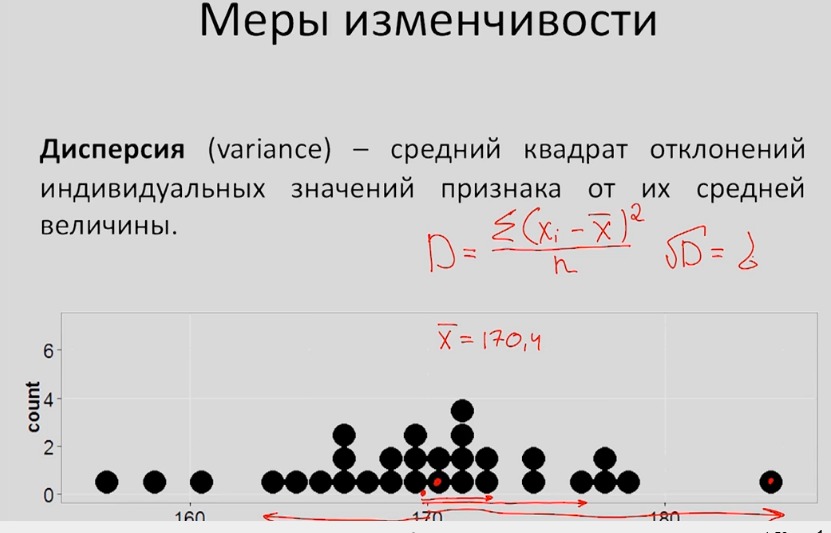


[WikiPedia](https://ru.wikipedia.org/wiki/Дисперсия_случайной_величины):

> **Диспе́рсия случа́йной величины́** — мера разброса значений [случайной величины](https://ru.wikipedia.org/wiki/случайная_величина) относительно её [математического ожидания](https://ru.wikipedia.org/wiki/математическое_ожидание). Обозначается $D[X]$ в русской литературе и $\operatorname{Var}(X)$ в зарубежной. В статистике часто употребляется обозначение $\sigma_X^2$ или $\sigma^2$.

> Квадратный корень из дисперсии, равный $\sigma$, называется [среднеквадрати́ческим отклоне́нием](https://ru.wikipedia.org/wiki/Среднеквадратическое_отклонение), [станда́ртным отклоне́нием](https://ru.wikipedia.org/wiki/Выборочное_стандартное_отклонение) или стандартным разбросом. Стандартное отклонение измеряется в тех же единицах, что и сама случайная величина, а дисперсия измеряется в квадратах этой единицы измерения.

# Меры центральной тенденции (мода, медиана)
https://stepik.org/lesson/8075/step/1?unit=1355

- https://stepik.org/lesson/8075/step/3?unit=1355: **Мода** - значение измеряемого признака, встречающееся максимально часто. Может быть несколько чисел, если есть совпадения.
- https://stepik.org/lesson/8075/step/4?unit=1355: **Медиана** - значение признака, которое делит упорядоченное множество даннных пополам.
При чётном количестве признаков, медиана является средним аифметическим двух центральных.

## Задача: Рассчитайте среднеквадратическое отклонение данных выборочных значений

https://stepik.org/lesson/8076/step/10?unit=1356

Рассчитайте среднеквадратическое отклонение данных выборочных значений:

1 5 2 7 1 9 3 8 5 9

Не забудьте, что при расчете дисперсии и среднеквадратичного отклонения мы вычитаем единицу из общего числа наблюдений!

In [1]:
%%groovy

nums = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9]

Groovy started successfully



[1, 5, 2, 7, 1, 9, 3, 8, 5, 9]

In [2]:
%%groovy

nums.sum()

50

In [3]:
%%groovy
p = new Plot()
p << new Line(y: nums, color: Color.green)

### Дисперсия (Variance) - Java/Groovy

https://stepik.org/lesson/8076/step/8?unit=1356

http://www.cs.sfu.ca/~ggbaker/data-science/content/filtering.html: 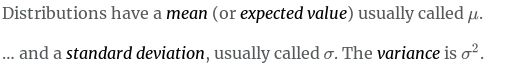

С терминами, разъяснениями и картинками **на английском**: https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c

#### Вручную

In [29]:
%%groovy
// Среднее (mean)
Mx = nums.sum() / nums.size()

5

In [38]:
%%groovy
// Дисперсия (variance):
D = nums.sum{ (it - Mx)**2 } / ( nums.size() - 1 )

10

In [40]:
%%groovy
// Стандартное отклонение (standard deviation, std):
Sd = D ** 0.5

3.1622776601683795

#### Apache Commons Math
https://stackoverflow.com/questions/1735870/simple-statistics-java-packages-for-calculating-mean-standard-deviation-etc/1735876#1735876
http://commons.apache.org/proper/commons-math/javadocs/api-3.2/org/apache/commons/math3/stat/descriptive/DescriptiveStatistics.html

In [42]:
%%groovy
@Grab(group='org.apache.commons', module='commons-math3', version='3.6.1')
import org.apache.commons.math3.stat.descriptive.DescriptiveStatistics

In [44]:
%%groovy
%classpath add mvn org.apache.commons commons-math3 3.6.1

null

In [49]:
%%groovy
%import org.apache.commons.math3.stat.descriptive.DescriptiveStatistics

class org.apache.commons.math3.stat.descriptive.DescriptiveStatistics

In [53]:
%%groovy
ds = new DescriptiveStatistics()
nums.each{ ds.addValue(it) }
ds

DescriptiveStatistics:
n: 10
min: 1.0
max: 9.0
mean: 5.0
std dev: 3.1622776601683795
median: 5.0
skewness: 0.0
kurtosis: -1.680952380952382


#### Tablesaw

- https://github.com/jtablesaw/tablesaw
- https://jtablesaw.github.io/tablesaw/gettingstarted

In [61]:
%%groovy
%classpath add mvn tech.tablesaw tablesaw-core LATEST
%import tech.tablesaw.api.DoubleColumn

In [68]:
%%groovy
/* DoubleColumn */ nc = DoubleColumn.create("Test", nums)
nc.print()


Column: Test
1.0
5.0
2.0
7.0
1.0
9.0
3.0
8.0
5.0
9.0


In [69]:
%%groovy
nc.standardDeviation()

3.1622776601683795

### Дисперсия (variance) - Python

In [70]:
nums = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9]

#### Вручную

In [72]:
nums

[1, 5, 2, 7, 1, 9, 3, 8, 5, 9]

In [77]:
# Среднее
Mx = sum(nums) / len(nums)
Mx

5.0

##### sum / map

In [103]:
# Дисперсия:
D = sum(map(lambda it: (it - Mx)**2, nums)) / ( len(nums) - 1 )
D

10.0

##### reduce

In [104]:
from functools import reduce
D = reduce((lambda sum, it: sum + (it - Mx)**2), nums, 0) / ( len(nums) - 1 )
D

10.0

In [107]:
# Стандартное отклонение (Std):
Sd = D**0.5
Sd

3.1622776601683795

### numpy

In [109]:
import numpy as np

In [111]:
np_nums = np.array(nums)
np_nums

array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])

In [119]:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.var.html
np_nums.var(ddof=1)

10.0

In [120]:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.std.html#numpy.std
np_nums.std(ddof=1)

3.1622776601683795

### Свойства Дисперсии и среднеквадратичного отклонения

1. D(x+c) = D(x). То есть, при добавлении любого числа к каждому элементу выборки - дисперсия не изменится! То есть сама выборка сдвигается, но её форма остаётеся прежней. https://stepik.org/lesson/8076/step/9?unit=1356
То же самое для Sd.
2. D(x*c) = D(x) * c^2
Sd(x*c) = Sd(x) * c
Если каждое значение признака умножить на число С, то стандартное отклонение (Sd) также изменится на эту величину (грачик растянется по x) - изменчивость увеличится

## Квартили распределения и график box-plot
https://stepik.org/lesson/9294/step/1?unit=1827

- **Квантили распределения** (eng [Quantile](https://en.wikipedia.org/wiki/Quantile)) - это такие значения признака, которые делят упорядоченные данные на некоторое число равных частей.
- **Квартили распределения** - это такие 3 точки (значения признака), которые делят наши данные (упорядоченное множество) на 4 равные части

![](https://i.imgur.com/lK6fAkR.png)

# Box Plot

Иногда называют "ящик с усами".
- Рассстояние между 1 и 3 квартилем называют **межквартильный размах**, и это одна из *мер изменчивости*. Чем больше размах, тем больше вариативность нашего признака.
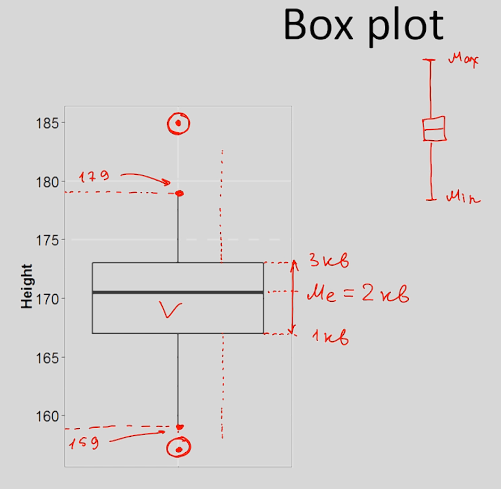

## Задача

https://stepik.org/lesson/9294/step/6?unit=1827

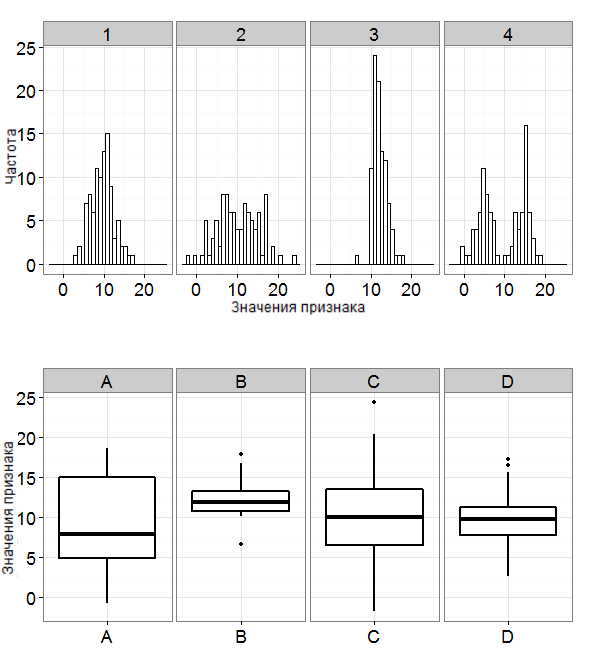

Соотнесите гистограммы частот и графики box-plot

Рассуждаем, смотря на комментарии:
1. https://stepik.org/lesson/9294/step/6?discussion=338940&unit= 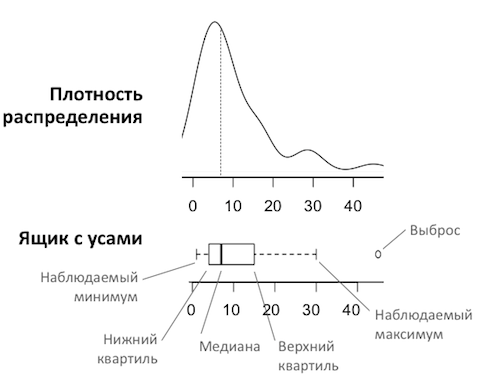

2. https://stepik.org/lesson/9294/step/6?discussion=49764&reply=50212&unit=1827 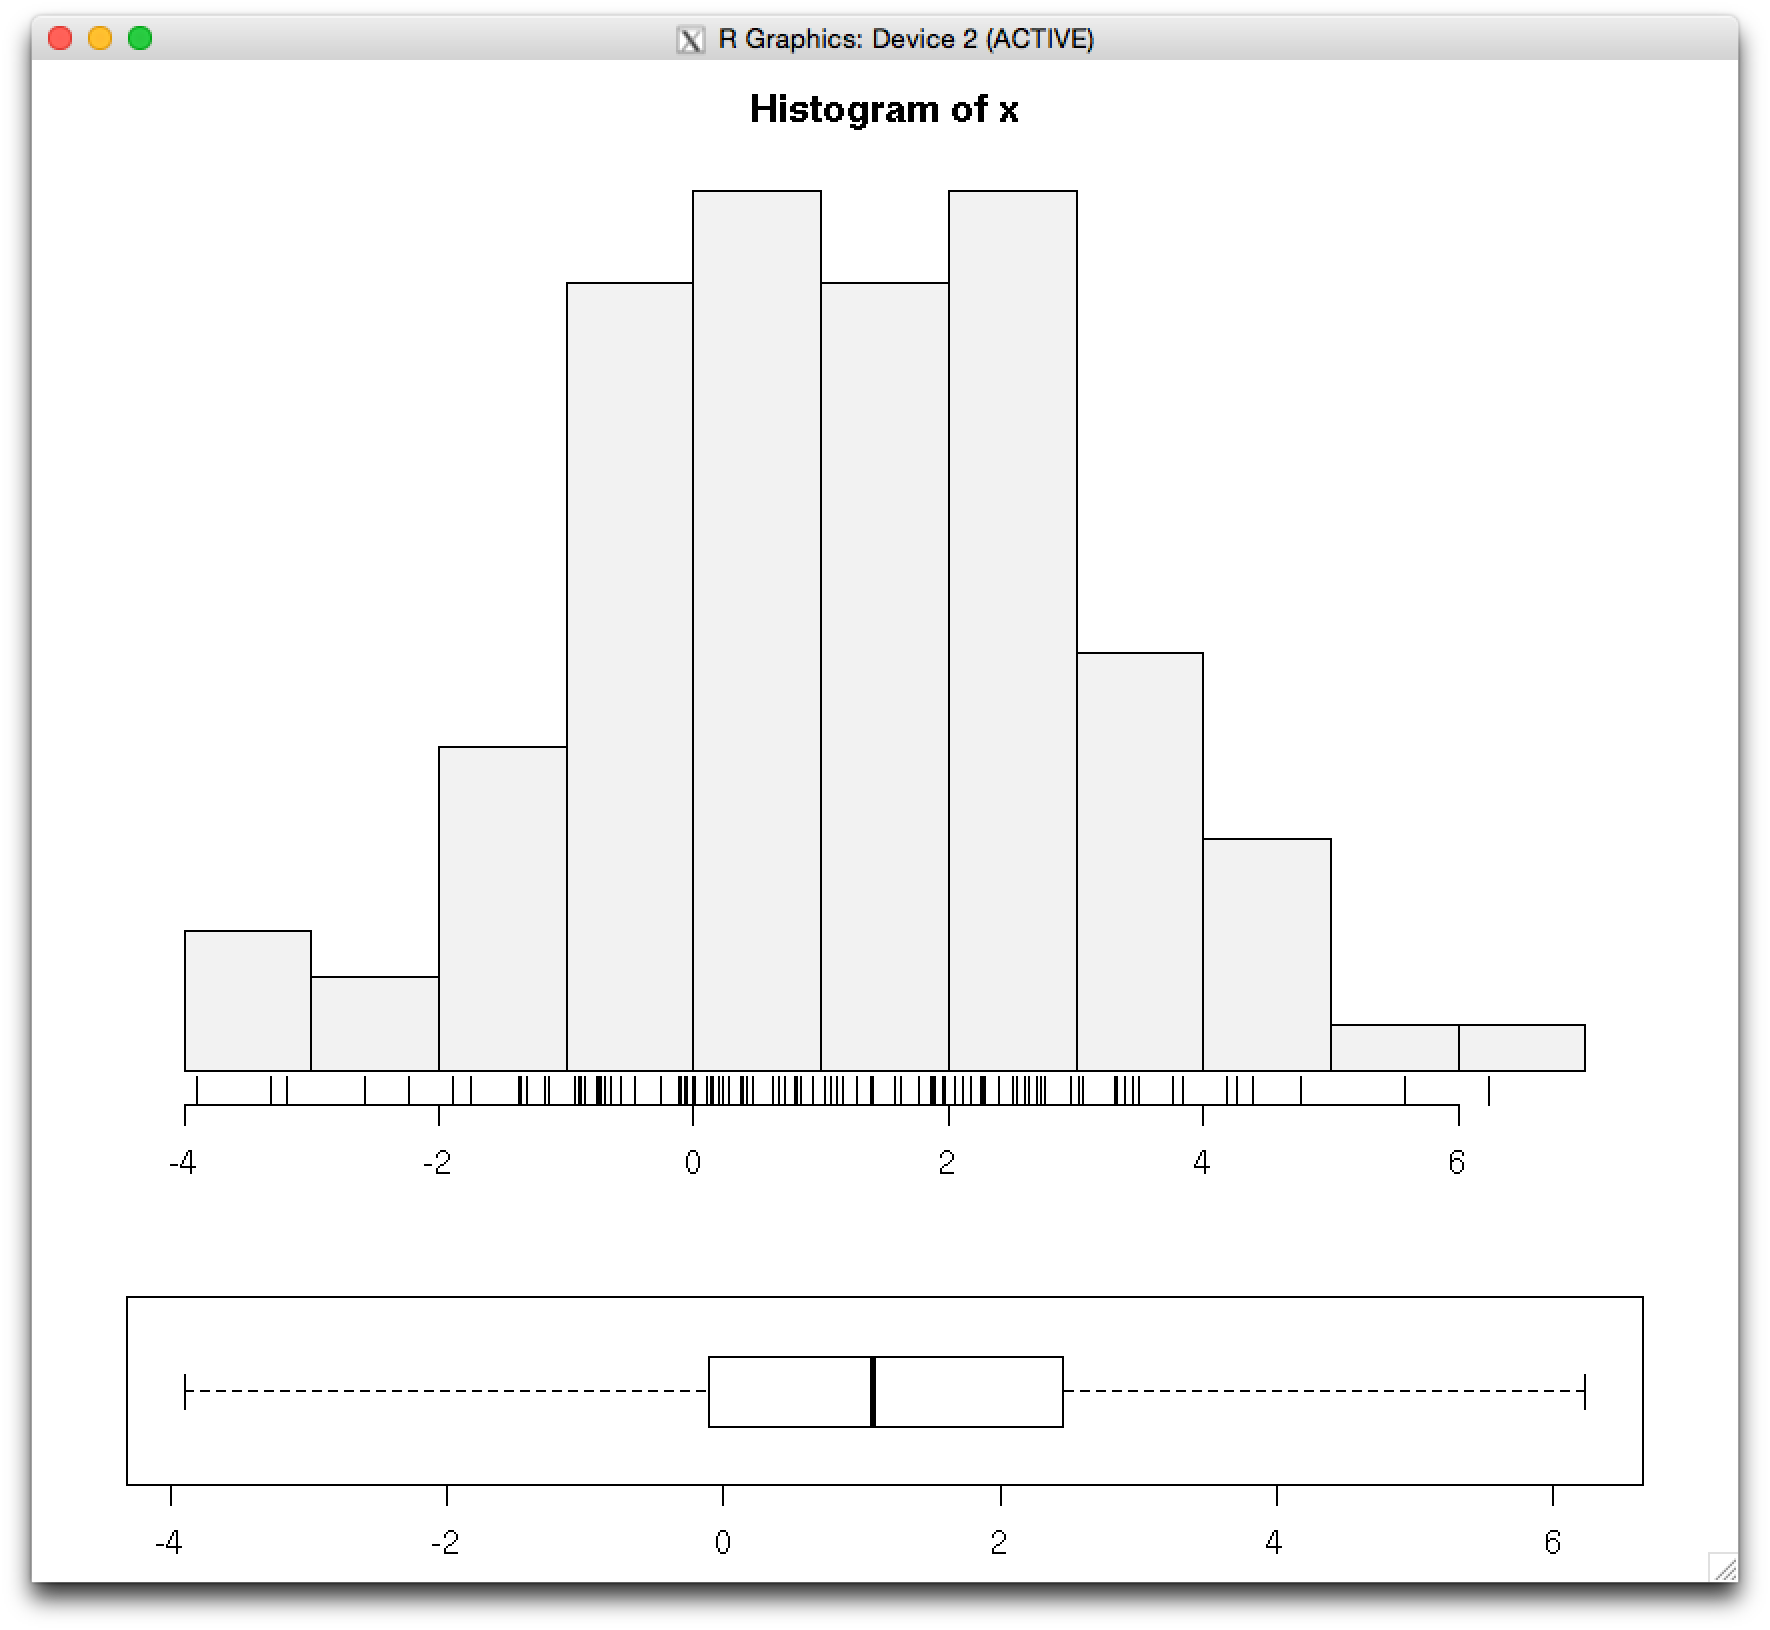

## Рассуждения и решение
1. Отрицательные значения есть только на 2 и 4. Значит они должны соотноситься с А и С.
2. **A - 4**, потому что медиана сильно смещена в межквартильном расстоянии, это потому что по частотам там 2 горба на графике. См. petal_width, petal_length ниже.
3. **C - 2** тогда
4. **B - 3**, потому что медиана сильно смещена вверх, и на графике большинство значений лежат на 10.
5. **D - 1**, остался :)

## Другие примеры графиков для понимания сути происходящего

In [3]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 7.5MB/s ta 0:00:01
    100% |████████████████████████████████| 12.9MB 2.3MB/s ta 0:00:011
    100% |████████████████████████████████| 24.8MB 1.7MB/s ta 0:00:011    55% |█████████████████▉              | 13.8MB 8.5MB/s eta 0:00:02    91% |█████████████████████████████▍  | 22.7MB 7.1MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 7.7MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 365kB/s ta 0:00:011


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/envs/beakerx/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


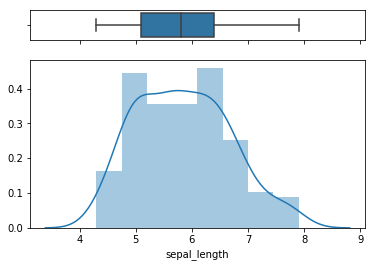

In [16]:
#Experimtns by: https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
# Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(df["sepal_length"], ax=ax_box)
sns.distplot(df["sepal_length"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


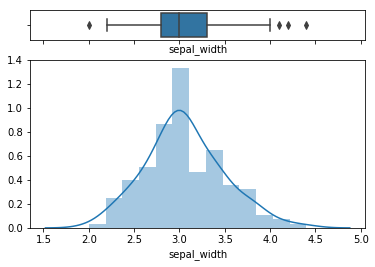

In [12]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["sepal_width"], ax=ax_box)
sns.distplot(df["sepal_width"], ax=ax_hist);

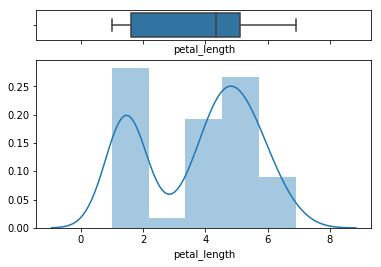

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["petal_length"], ax=ax_box)
sns.distplot(df["petal_length"], ax=ax_hist);

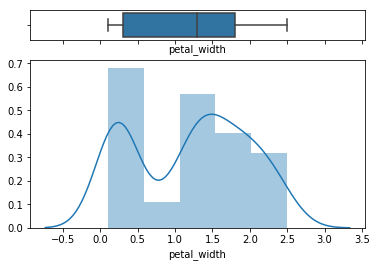

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["petal_width"], ax=ax_box)
sns.distplot(df["petal_width"], ax=ax_hist);

# Нормальное распределение

https://stepik.org/lesson/Нормальное-распределение-9166/step/2?unit=1828

**Нормальное распределение** - это унимодальное и симметричное распределение. При этом отклонение наших значений от среднего подчиняется определённому вероятностному закону:
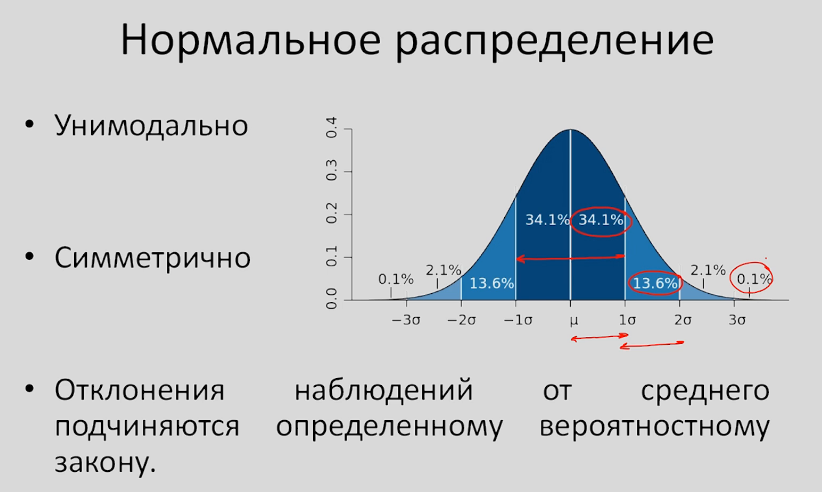

## Z-Стандартизация (Z-Score)

https://stepik.org/lesson/Нормальное-распределение-9166/step/3?unit=1828
https://stepik.org/lesson/Нормальное-распределение-9166/step/5?unit=1828

**Z-стандартизация (преобразование)** - такое преобразование данных, которое позволяет нам любую нашу шкалу перевести в следующий тип (Z-шкала, Z-scores) - где среднее значение равно 0, а стандартное отклонение равно 1.

https://ru.wikipedia.org/wiki/Z-оценка (image):

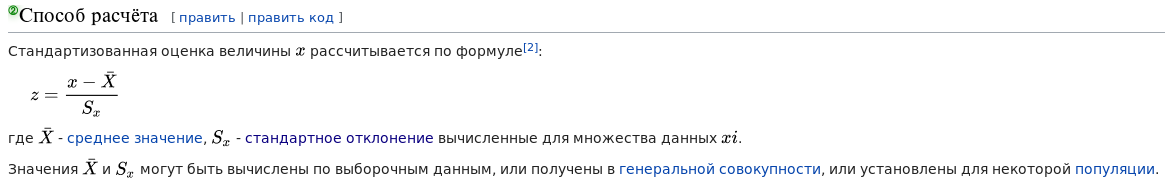

https://ru.wikipedia.org/wiki/Z-оценка quote:

Стандартизованная оценка величины $x$ рассчитывается по формуле:

$$z={x- \bar{X} \over S_x}$$

где $\bar{X}$ -  [Среднее арифметическое](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5_%D0%B0%D1%80%D0%B8%D1%84%D0%BC%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5), $S_x$ - [Среднеквадратическое отклонение](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5) вычисленные для множества данных $x_i$.

Значения $\bar{X}$ и $S_x$ могут быть вычислены по выборочным данным, или получены в [Генеральная совокупность](https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D0%B2%D0%BE%D0%BA%D1%83%D0%BF%D0%BD%D0%BE%D1%81%D1%82%D1%8C), или установлены для  некоторой [Популяция](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BF%D1%83%D0%BB%D1%8F%D1%86%D0%B8%D1%8F).
:


### Задача: пример рассчёта Z-Score

https://stepik.org/lesson/9166/step/6?unit=1828

Z - преобразование часто используется, чтобы все наблюдения перевести в z - шкалу (M = 0, sd = 1) для упрощения работы с данными. Однако иногда нам необходимо рассчитать z - значение только для отдельно взятого наблюдения, чтоб выяснить насколько далеко оно отклоняется от среднего значения в единицах стандартного отклонения.

Вернемся к нашему примеру с ростом людей. Допустим, мы измерили рост 1000 человек, данное распределение оказалось нормальным со средним равным 175 и стандартным отклонением равным 8 (M = 175, sd = 8). Рост одного из испытуемых составил 186,2. Чему равняется z - значение, рассчитанное для этого испытуемого?


In [23]:
(186.2 - 175) / 8

1.3999999999999986

Правильный ответ был 1.4

### Правило "двух" и "трёх" $\sigma$ (Сигм)

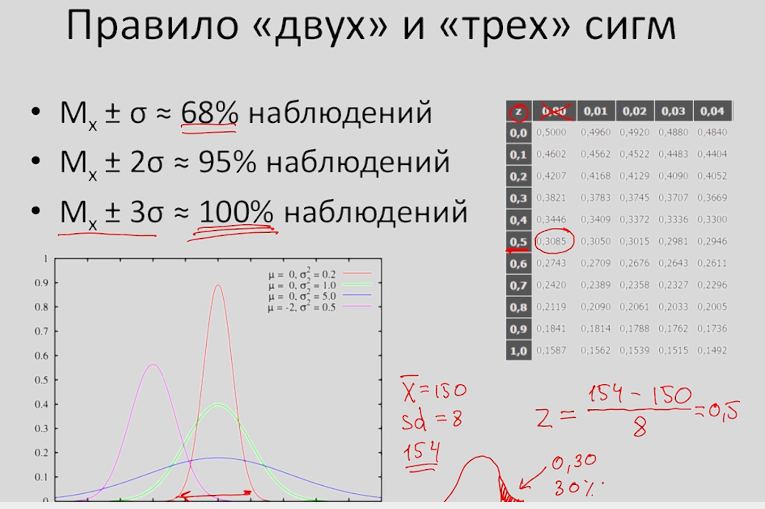

#### Задача: ±2$\sigma$

https://stepik.org/lesson/9166/step/11?unit=1828

Допустим, что некоторый признак распределен нормально, выборочное среднее равняется 100, а дисперсия равняется 25 (M = 100, D = 25). Тогда приблизительно 95% всех наблюдений находится в диапазоне.

In [31]:
( 100 - sqrt(25) * 2, 100 + sqrt(25) * 2 )

(90.0, 110.0)

#### Задача: Какой приблизительно процент людей обладает IQ > 125 (M = 100, sd = 15)?

https://stepik.org/lesson/9166/step/12?unit=1828

Чтобы определить, какой процент наблюдений превышает интересующее нас значение z-значение, используются специальные таблицы. Будьте аккуратны при использовании этих таблиц: часто для интересующего нас z-значения указывается процент наблюдений, который не превосходит указанное z-значение.

Для решения следующих заданий используйте таблицы z-значений.

http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf  (процент наблюдений, не превышающий указанное z-значение)

http://www.normaltable.com/ztable-righttailed.html  (процент наблюдений, превышающий указанное z-значение)


Вы также можете воспользоваться специальным сайтом, позволяющим вычислить процент наблюдений в интересующем нас диапазоне:


https://gallery.shinyapps.io/dist_calc/﻿  (по умолчанию выставлено стандартное нормальное распределение  M=0, sd=1)

Попробуйте использовать оба источника, чтоб сверить свои ответы.
Задача

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).

Какой приблизительно процент людей обладает IQ > 125?

Тест — Выберите один вариант из списка:
10%
5%
15%
25%


In [34]:
z = (125 - 100) / 15
z

1.6666666666666667

По таблице http://users.stat.ufl.edu/~athienit/Tables/Ztable.pdf значению z=1.7 соответствует (1 столбец `.00`) - 0.9554.
Соответственно 95,54% людей, имеют IQ <= 125, и только около 5% больше (верный ответ)

In [36]:
1 - 0.9554

0.04459999999999997

#### Задача: Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112 (M = 100, sd = 15)?

https://stepik.org/lesson/9166/step/13?unit=1828

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).

Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112?

 Тест — Выберите один вариант из списка:
- 77%
- 92%
- 85%
- 60%


In [38]:
(70 - 100) / 15, (112 - 100) / 15

(-2.0, 0.8)

Смотрим http://users.stat.ufl.edu/~athienit/Tables/Ztable.pdf:

Кстати https://gallery.shinyapps.io/dist_calc/ позволяет сразу отобразить и выбрать какие границы смотрим.

- -2 - .0228 - нижняя граница, нам надо больше (`a` в https://gallery.shinyapps.io/dist_calc/ для режима `Find Area: Middle`)
- 0.8 - .7881 - верхняя граница, нам надо меньше (`b` в https://gallery.shinyapps.io/dist_calc/ для режима `Find Area: Middle`)

In [43]:
.7881 - .0228

0.7653

Соответственно верный ответ 77%

# Центральная предельная теорема

https://stepik.org/lesson/8077/step/1?unit=1357

Слайды к этому уроку доступны для скачивания [в формате PDF](https://stepik.org/media/attachments/lesson/8077/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20-%20%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0.pdf).

Ссылка на сайт с симуляцией данных для центральной предельной теоремы.

https://gallery.shinyapps.io/CLT_mean/﻿

[Стандартная ошибка среднего](http://statistica.ru/glossary/general/ctandartnaya-oshibka-srednego/)

Стандартная ошибка среднего (SEM) - теоретическое стандартное отклонение всех средних выборки размера n, извлекаемое из совокупности.
Стандартная ошибка среднего подсчитывается следующим образом:   
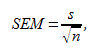
.

где s - стандартное отклонение, подсчитанное по выборке,

n – число наблюдений в выборке.

Если разбить некоторую выборку на боле мелкие подвыборки (по 35 штук на примере):
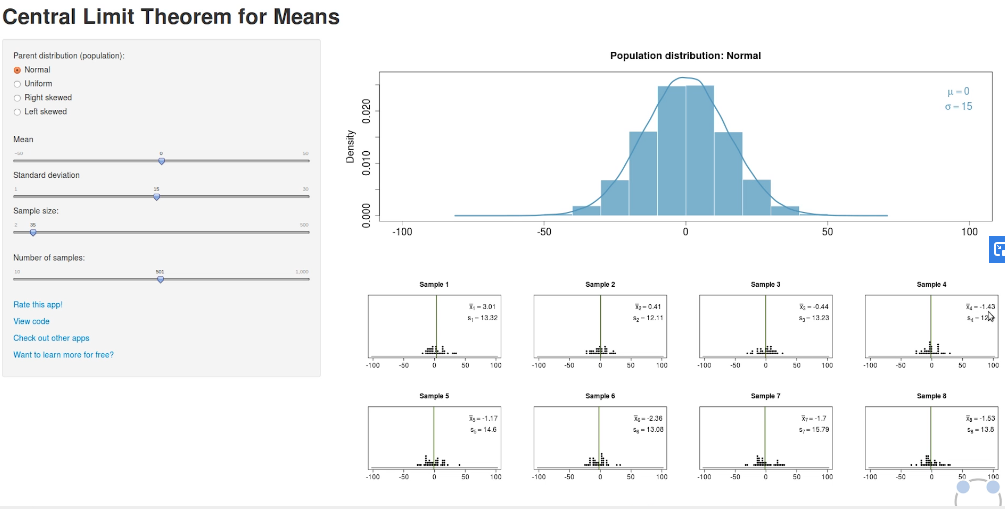
то средние и дисперсия будут отличаться от таковых для полной выборки (и +, и -).

Но вот распределение **средних**, по эти выборкам, будет очень близко к полной генеральной совокупности:
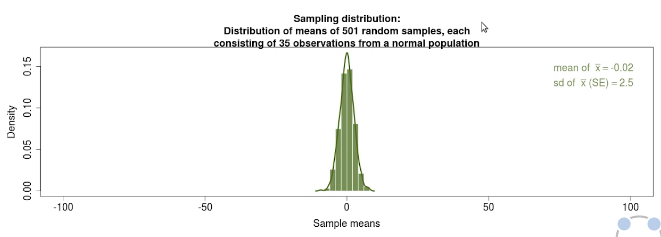

То есть **среднее всех средних** будет очень близко к **среднему** в *генеральной совокупности*!

Стандартное отклонение этого распределения называется **стандартной ошибкой среднего**. И показывает на сколько в среднем, средние значения выборочные отклоняются от среднего генеральной совокупности.

Если значительно увеличить количество сэмплов, то и ошибка сильно уменьшиться:
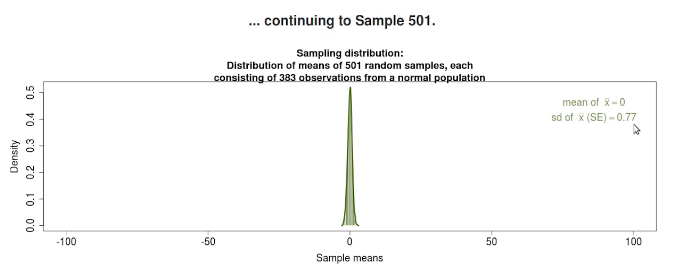

Получается что по одной маленькой выборке можно судить о полной совокупности:
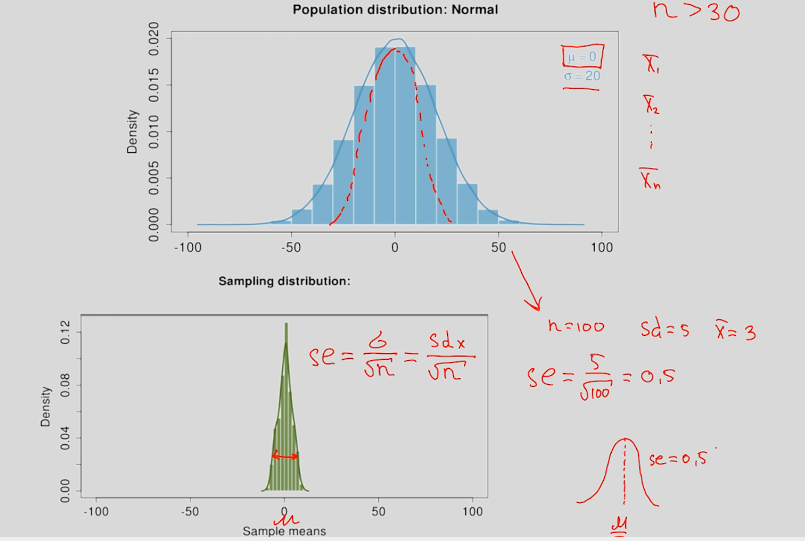

## Задача 1

Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100

In [7]:
(4 ** .5) / (100 ** .5)

0.2

1. правильный ответ 0.2
2. Среднее не нужно, дано видимо чтобы запутать (также и в комментариях говорят)
3. Корень из 4, потому что σ = **корень** из дисперсии!

## Задача 2

Как соотносятся стандартная ошибка среднего и выборочное стандартное отклонение исследуемого признака?

Ответ: **Стандартная ошибка** всегда меньше, чем **стандартное отклонение**

Из [комментария](https://stepik.org/lesson/8077/step/8?auth=login&discussion=79843&unit=1357): "**Стандартная ошибка** - это соотношение **стандартного отклонения** к квадратному корню кол-ва наблюдений. Кол-во наблюдений  в данном случае постоянно. Дальше, свойство дробей."

## Задача 3
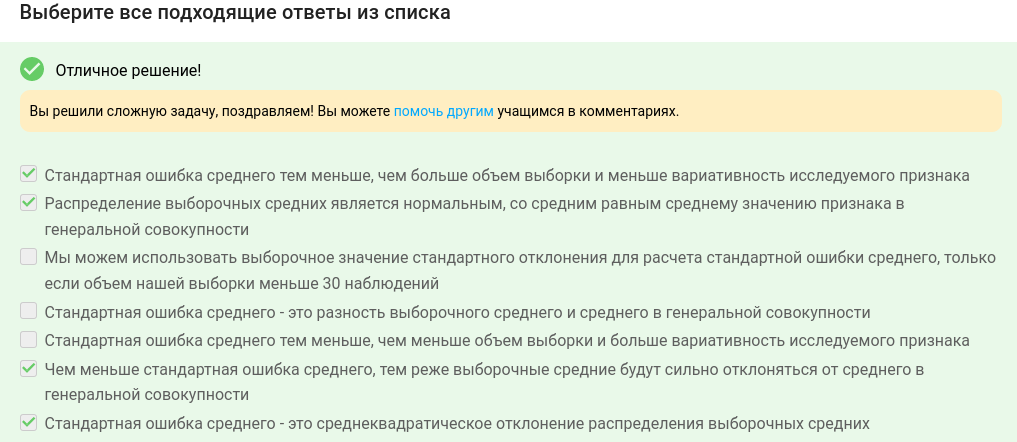